In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_alunos = pd.read_csv('desempenho_escolar.csv')

1. Leitura e limpeza dos dados
   
- Leia o dataset e exiba as primeiras linhas.

- Verifique valores nulos e duplicatas.

- Limpe o dataset (trate nulos e remova duplicatas).

In [98]:
tamanho_sem_tratar = df_alunos.shape
print(tamanho)
df_alunos.head()

(505, 10)


,aluno_id,idade,sexo,nota_matematica,nota_portugues,frequencia,deficiencia,renda_familiar,regiao,escola_id
0,1,16,F,9.0,4.2,75,Não,Alta,Nordeste,1013
1,2,17,F,7.1,5.5,63,Não,Alta,Sul,1019
2,3,15,F,3.9,9.2,83,Não,Baixa,Norte,1014
3,4,17,M,5.6,7.2,93,Não,Média,Sudeste,1013
4,5,17,F,4.2,NaN,89,Não,Baixa,Nordeste,1004


In [100]:
df_alunos = df_alunos.drop_duplicates(subset=['aluno_id'])
tamanho_pos_tratar = df_alunos.shape
print(tamanho_pos_tratar)
df_alunos.head()

(500, 10)


,aluno_id,idade,sexo,nota_matematica,nota_portugues,frequencia,deficiencia,renda_familiar,regiao,escola_id
0,1,16,F,9.0,4.2,75,Não,Alta,Nordeste,1013
1,2,17,F,7.1,5.5,63,Não,Alta,Sul,1019
2,3,15,F,3.9,9.2,83,Não,Baixa,Norte,1014
3,4,17,M,5.6,7.2,93,Não,Média,Sudeste,1013
4,5,17,F,4.2,NaN,89,Não,Baixa,Nordeste,1004


In [102]:
df_alunos.isna().sum()

aluno_id            0
idade               0
sexo                0
nota_matematica    20
nota_portugues     10
frequencia          0
deficiencia         0
renda_familiar      0
regiao              0
escola_id           0
dtype: int64

In [118]:
media_arredondada_mat = round(df_alunos['nota_matematica'].mean(), 2)
df_alunos['nota_matematica'] = df_alunos['nota_matematica'].fillna(media_arredondada_mat)

In [119]:
media_arredondada_port = round(df_alunos['nota_portugues'].mean(), 2)
df_alunos['media_portugues'] = df_alunos['nota_portugues'].fillna(media_arredondada_port)

In [120]:
df_alunos.isna().sum()

aluno_id           0
idade              0
sexo               0
nota_matematica    0
nota_portugues     0
frequencia         0
deficiencia        0
renda_familiar     0
regiao             0
escola_id          0
media_portugues    0
dtype: int64

2. Análise estatística básica
- Qual a média de nota em matemática e português?

- A média muda conforme a renda familiar?

- Como a frequência se distribui entre os alunos?

In [124]:
media_att_mat = round(df_alunos['nota_matematica'].mean(), 2)
media_att_port = round(df_alunos['nota_portugues'].mean(), 2)
print(f'A média de matemática é {media_att_mat} e a média de português é {media_att_port}')

A média de matemática é 6.07 e a média de português é 6.17


In [181]:
media_renda_mat = df_alunos.groupby('renda_familiar')['nota_matematica'].mean()
media_renda_port = df_alunos.groupby('renda_familiar')['nota_portugues'].mean()
print(media_renda_mat)
print(media_renda_port)

renda_familiar
Alta     6.127209
Baixa    6.008449
Média    6.129528
Name: nota_matematica, dtype: float64
renda_familiar
Alta     5.932558
Baixa    6.226204
Média    6.151792
Name: nota_portugues, dtype: float64


In [148]:
df_alunos['frequencia'].describe()

count    500.000000
mean      80.156000
std       11.614709
min       60.000000
25%       70.000000
50%       80.000000
75%       89.000000
max      100.000000
Name: frequencia, dtype: float64

In [152]:
condicao = [
    df_alunos['frequencia'] < 70,
    (df_alunos['frequencia'] >= 70) & (df_alunos['frequencia'] < 80),
    (df_alunos['frequencia'] >= 80) & (df_alunos['frequencia'] <89)
]

valores = ['Baixa', 'Normal', 'Alta']

df_alunos['classificacao_freq'] = np.select(condicao, valores, default='Muito Alta')
df_alunos

,aluno_id,idade,sexo,nota_matematica,nota_portugues,frequencia,deficiencia,renda_familiar,regiao,escola_id,media_portugues,classificacao_freq
0,1,16,F,9.00,4.20,75,Não,Alta,Nordeste,1013,4.20,Normal
1,2,17,F,7.10,5.50,63,Não,Alta,Sul,1019,5.50,Baixa
2,3,15,F,3.90,9.20,83,Não,Baixa,Norte,1014,9.20,Alta
3,4,17,M,5.60,7.20,93,Não,Média,Sudeste,1013,7.20,Muito Alta
4,5,17,F,4.20,6.17,89,Não,Baixa,Nordeste,1004,6.17,Muito Alta
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,13,F,6.10,8.30,79,Não,Média,Norte,1012,8.30,Normal
496,497,15,M,6.40,5.00,77,Não,Média,Centro-Oeste,1004,5.00,Normal
497,498,13,F,6.07,10.60,77,Não,Baixa,Nordeste,1007,10.60,Normal
498,499,13,M,6.07,5.00,61,Não,Baixa,Sul,1000,5.00,Baixa


In [157]:
df_alunos['classificacao_freq'].value_counts()

classificacao_freq
Muito Alta    139
Alta          124
Normal        121
Baixa         116
Name: count, dtype: int64

3. Visualizações
- Crie um histograma das notas de matemática.

- Faça um boxplot comparando a nota de português entre os sexos.

- Crie um gráfico de barras com a média das notas por região.

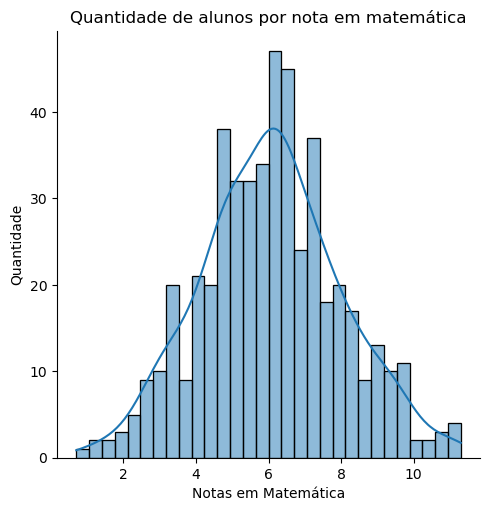

In [171]:
sns.displot(data=df_alunos, x='nota_matematica', kde=True, bins=30)
plt.xlabel('Notas em Matemática')
plt.ylabel('Quantidade')
plt.title('Quantidade de alunos por nota em matemática')
plt.show()

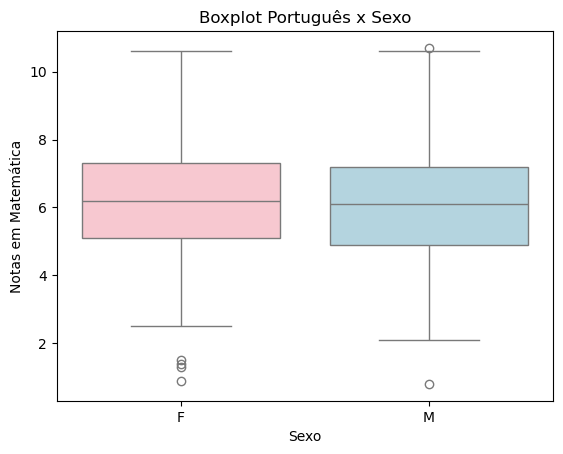

In [180]:
sns.boxplot(data=df_alunos, y='nota_portugues', x='sexo', hue='sexo', palette={'F':'pink', 'M':'lightblue'})
plt.ylabel('Notas em Matemática')
plt.xlabel('Sexo')
plt.title('Boxplot Português x Sexo')
plt.show()

In [184]:
df_alunos['media'] = round((df_alunos['nota_matematica'] + df_alunos['nota_portugues'])/2,2)

In [185]:
df_alunos

,aluno_id,idade,sexo,nota_matematica,nota_portugues,frequencia,deficiencia,renda_familiar,regiao,escola_id,media_portugues,classificacao_freq,media
0,1,16,F,9.00,4.20,75,Não,Alta,Nordeste,1013,4.20,Normal,6.60
1,2,17,F,7.10,5.50,63,Não,Alta,Sul,1019,5.50,Baixa,6.30
2,3,15,F,3.90,9.20,83,Não,Baixa,Norte,1014,9.20,Alta,6.55
3,4,17,M,5.60,7.20,93,Não,Média,Sudeste,1013,7.20,Muito Alta,6.40
4,5,17,F,4.20,6.17,89,Não,Baixa,Nordeste,1004,6.17,Muito Alta,5.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,13,F,6.10,8.30,79,Não,Média,Norte,1012,8.30,Normal,7.20
496,497,15,M,6.40,5.00,77,Não,Média,Centro-Oeste,1004,5.00,Normal,5.70
497,498,13,F,6.07,10.60,77,Não,Baixa,Nordeste,1007,10.60,Normal,8.34
498,499,13,M,6.07,5.00,61,Não,Baixa,Sul,1000,5.00,Baixa,5.54


In [197]:
media_regiao = round(df_alunos.groupby('regiao')['media'].mean(),2)

In [198]:
media_regiao

regiao
Centro-Oeste    6.34
Nordeste        5.97
Norte           6.18
Sudeste         6.00
Sul             6.12
Name: media, dtype: float64

(0.0, 10.0)

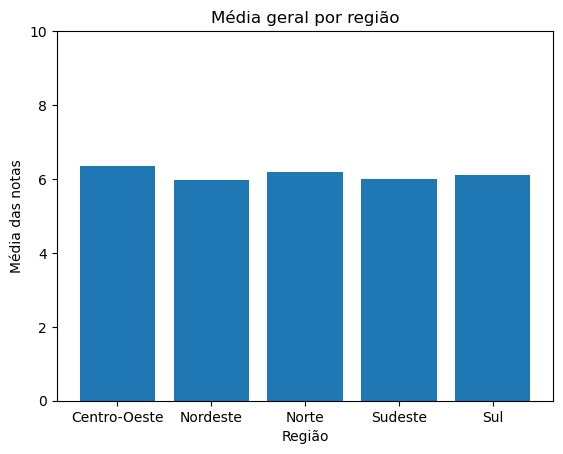

In [202]:
plt.bar(media_regiao.index, media_regiao.values)
plt.title('Média geral por região')
plt.xlabel('Região')
plt.ylabel('Média das notas')
plt.ylim(0, 10)

4. Crosstab + análise

Use pd.crosstab para cruzar:

- Renda familiar × deficiência

- Sexo × aprovação (defina aprovação como média das notas ≥ 6)

In [208]:
pd.crosstab(df_alunos['renda_familiar'],df_alunos['deficiencia'])

deficiencia,Não,Sim
renda_familiar,,
Alta,39,4
Baixa,223,22
Média,182,30


In [209]:
condicao2 = [
    df_alunos['media'] < 6
]
resultado2 = ['Reprovado']

df_alunos['resultado_final'] = np.select(condicao2, resultado2, default='Aprovado')

In [211]:
pd.crosstab(df_alunos['sexo'],df_alunos['resultado_final'])

resultado_final,Aprovado,Reprovado
sexo,,
F,133,100
M,143,124


5. Desafio de análise
   
- Há indícios de desigualdade de desempenho escolar por região ou renda?

- Alunos com deficiência apresentam médias significativamente menores?

- Frequência influencia o desempenho?

In [223]:
round(df_alunos.groupby(['renda_familiar','regiao'])['media'].mean(),2)

renda_familiar  regiao      
Alta            Centro-Oeste    6.28
                Nordeste        6.25
                Norte           5.47
                Sudeste         5.65
                Sul             6.40
Baixa           Centro-Oeste    6.46
                Nordeste        5.74
                Norte           6.03
                Sudeste         6.20
                Sul             6.11
Média           Centro-Oeste    6.18
                Nordeste        6.17
                Norte           6.46
                Sudeste         5.84
                Sul             6.06
Name: media, dtype: float64

In [224]:
round(df_alunos.groupby('deficiencia')['media'].mean(),2)

deficiencia
Não    6.13
Sim    6.02
Name: media, dtype: float64

In [226]:
round(df_alunos.groupby('classificacao_freq')['media'].mean(),2)

classificacao_freq
Alta          6.46
Baixa         6.01
Muito Alta    6.05
Normal        5.96
Name: media, dtype: float64